# Continuous Variable Probabilistic Methods for Identifying Outliers

- first figure out WHAT is different

## First, Visualize
- Look at distribution and spread:
    - boxplots
    - histograms
    - scatterplots
    
<br>

- Descriptive statistics do not tell the whole story
    - Ascombe's Quartet
        - 4 different blocks of information
        - descriptive stats are all the same
            - mean, median, max, min, etc
        - BUT data is all different, **must** visualize

<hr style="border:1px solid black"> </hr>

## Empirical Rule, Three Sigma Rule, 68-95-99.7 Rule
<br>

1. An observational tactic for normal data
- normal distribution has some qualities to find outliers
- Standard bell curve, assess normality

<br>

2. 
    - 68% = 1 standard deviation
    - 95% = 2 standard deviations
    - 99.7% = 3 standard deviations

<br>

3. Caveats

<hr style="border:1px solid black"> </hr>

## Z-Score
- x -x_mean/x_std
- the difference btwn the mean and the data point as a poroportion of the standard deviation
- closer to 0 = closer to mean

<hr style="border:1px solid black"> </hr>

## Black Swans Event
- phenomenon: black swans are extremely rare. not seen until colonialization
- Something that we thought was previously not possible
- ex: Dow Jones dropping 23% in one day in 1987
    - previously not thought to be possible

<hr style="border:1px solid black"> </hr>

## IQR
- works for non-normal distributed data
- calculate lower fence: Q1 - (1.5*IQR)
- calculate upper fence: Q3 + (1.5*IQR)

<hr style="border:2px solid black"> </hr>

# Practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pydataset import data

In [2]:
#call the url
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

In [3]:
#read the csv and assign it to df
df = pd.read_csv(url)

In [4]:
#use descriptive stats and assign it to its own variable
stats = df.describe()
stats

,id,x,y
count,44.000000,44.000000,44.000000
mean,21.500000,9.000000,7.500682
std,12.845233,3.198837,1.958925
min,0.000000,4.000000,3.100000
25%,10.750000,7.000000,6.117500
50%,21.500000,8.000000,7.520000
75%,32.250000,11.000000,8.747500
max,43.000000,19.000000,12.740000


In [5]:
#look at the stats for EACH dataset
df.groupby('dataset').describe()

id                                                   x       ...  \
        count  mean       std   min   25%   50%   75%   max count mean  ...   
dataset                                                                 ...   
I        11.0   5.0  3.316625   0.0   2.5   5.0   7.5  10.0  11.0  9.0  ...   
II       11.0  16.0  3.316625  11.0  13.5  16.0  18.5  21.0  11.0  9.0  ...   
III      11.0  27.0  3.316625  22.0  24.5  27.0  29.5  32.0  11.0  9.0  ...   
IV       11.0  38.0  3.316625  33.0  35.5  38.0  40.5  43.0  11.0  9.0  ...   

                        y                                                      
          75%   max count      mean       std   min    25%   50%   75%    max  
dataset                                                                        
I        11.5  14.0  11.0  7.500909  2.031568  4.26  6.315  7.58  8.57  10.84  
II       11.5  14.0  11.0  7.500909  2.031657  3.10  6.695  8.14  8.95   9.26  
III      11.5  14.0  11.0  7.500000  2.030424  5.39  6.250  7.11  7.98  12.74  
IV        8.0  19.0  11.0  7.500909  2.030579  5.25  6.170  7.04  8.19  12.50  

[4 rows x 24 columns]

In [6]:
#pull out only mean and median for each dataset
df.groupby('dataset').describe()[['x','y']][list(itertools.product(['x', 'y'], ['50%', 'mean']))]

x          y          
         50% mean   50%      mean
dataset                          
I        9.0  9.0  7.58  7.500909
II       9.0  9.0  8.14  7.500909
III      9.0  9.0  7.11  7.500000
IV       8.0  9.0  7.04  7.500909

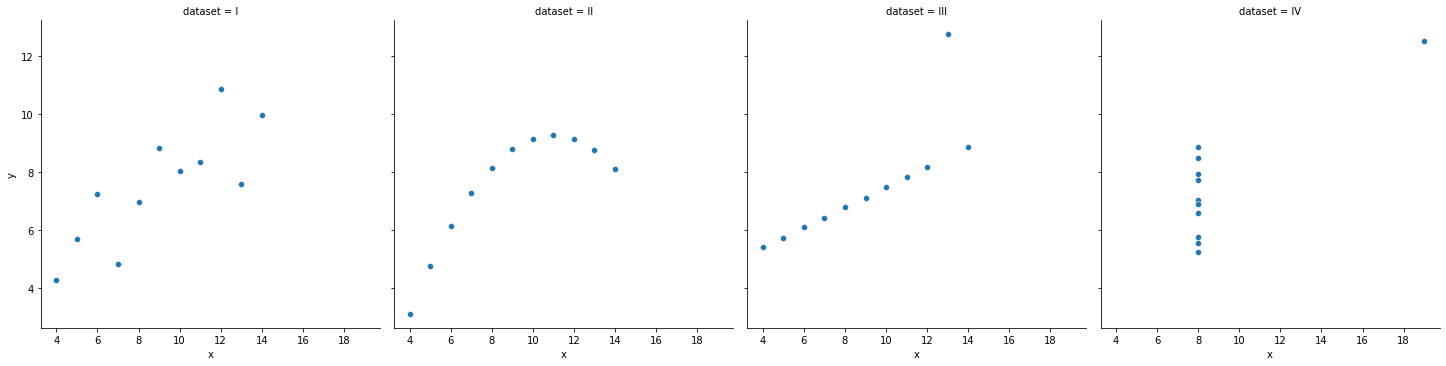

In [7]:
sns.relplot(x='x', y='y', col='dataset', data=df)
#1: some positive correlation
#2: begininning of a exponenial curve
#3: one outlier (possible anomaly) but positive linear correlation
#4: defined regression line, one outlier

<hr style="border:2px solid black"> </hr>

## Swiss Dataset

In [8]:
#import data from pydataset
swiss = data('swiss')

In [9]:
#take a look
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [10]:
#descriptive stats
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [11]:
#look at nulls and dtypes
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


## Visualize!

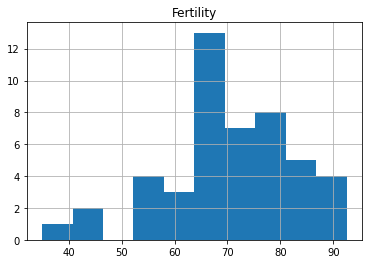

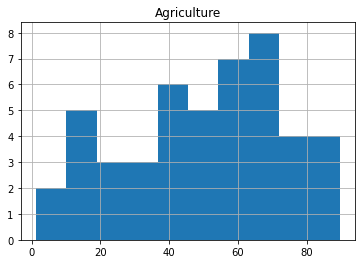

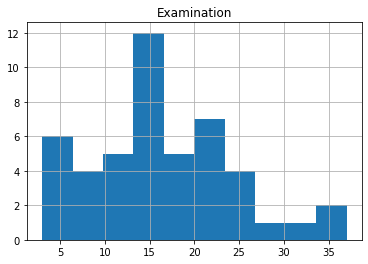

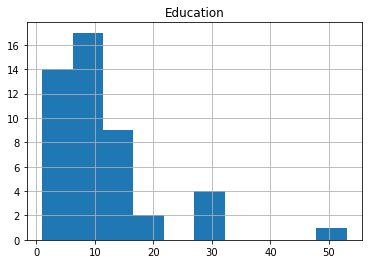

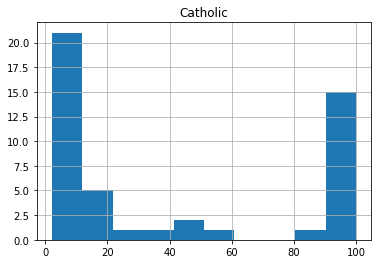

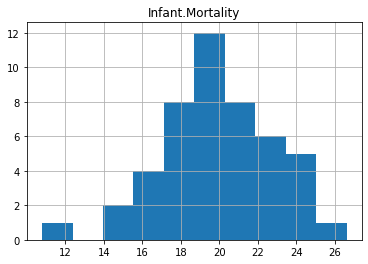

In [12]:
#plot distributions

for col in swiss.columns:
    #determine if is numeric dtype
    if np.issubdtype(swiss[col].dtype, np.number):
        #histogram if it is numeric
        swiss[col].hist()
        plt.title(col)
        plt.show()

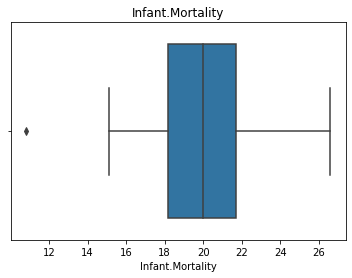

In [25]:
sns.boxplot(data=swiss, x= 'Infant.Mortality')
plt.title(col)
plt.show()

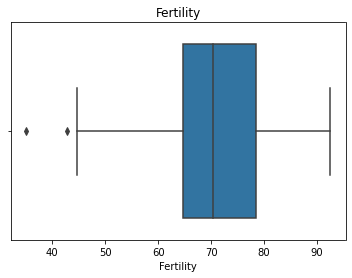

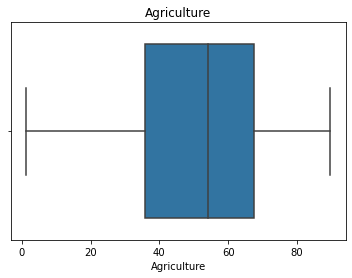

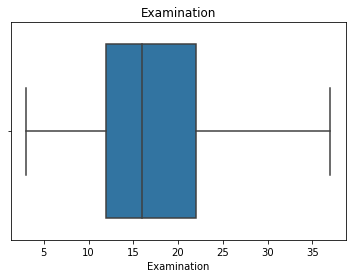

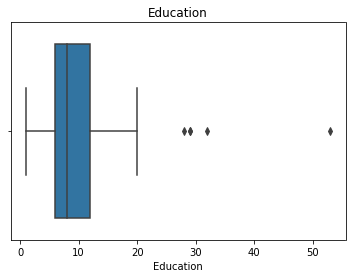

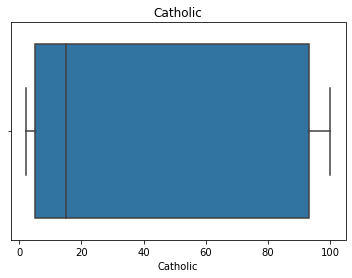

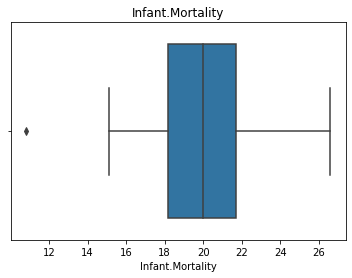

In [13]:
#boxplots
for col in swiss.columns:
    #determine if is numeric dtype
    if np.issubdtype(swiss[col].dtype, np.number):
        #boxplot if it is numeric
        sns.boxplot(data=swiss, x= col)
        plt.title(col)
        plt.show()

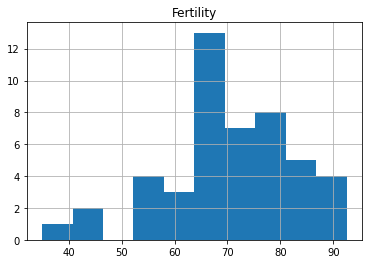

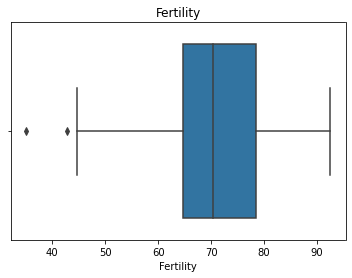

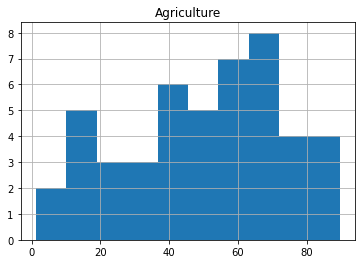

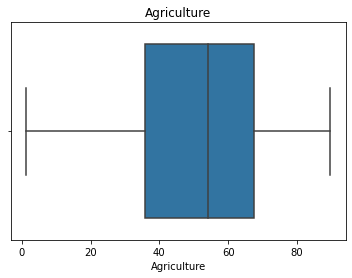

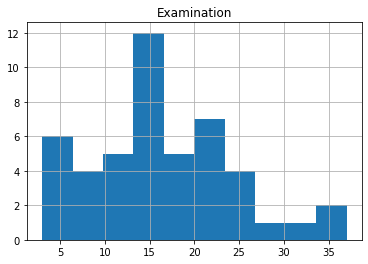

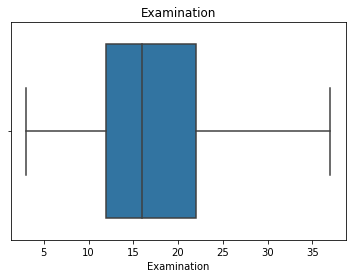

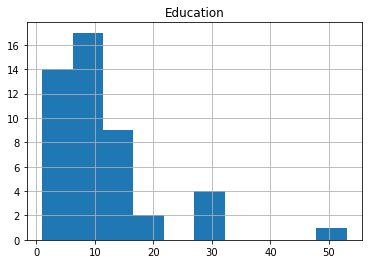

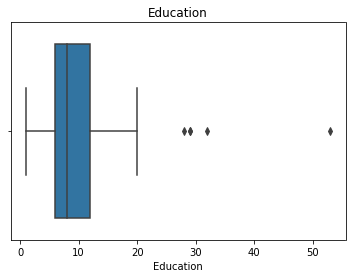

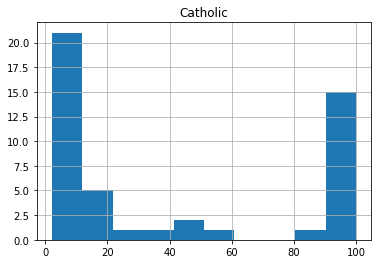

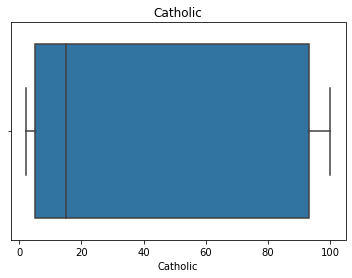

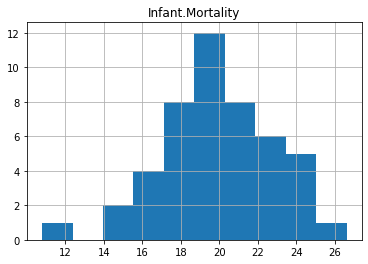

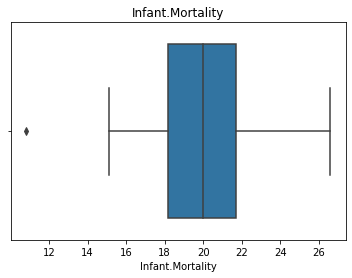

In [14]:
#put histogram and boxplot next to eachother
for col in swiss.columns:
    #determine if is numeric dtype
    if np.issubdtype(swiss[col].dtype, np.number):
        #histogram if it is numeric
        swiss[col].hist()
        plt.title(col)
        plt.show()
        #boxplot if it is numeric
        sns.boxplot(data=swiss, x= col)
        plt.title(col)
        plt.show()

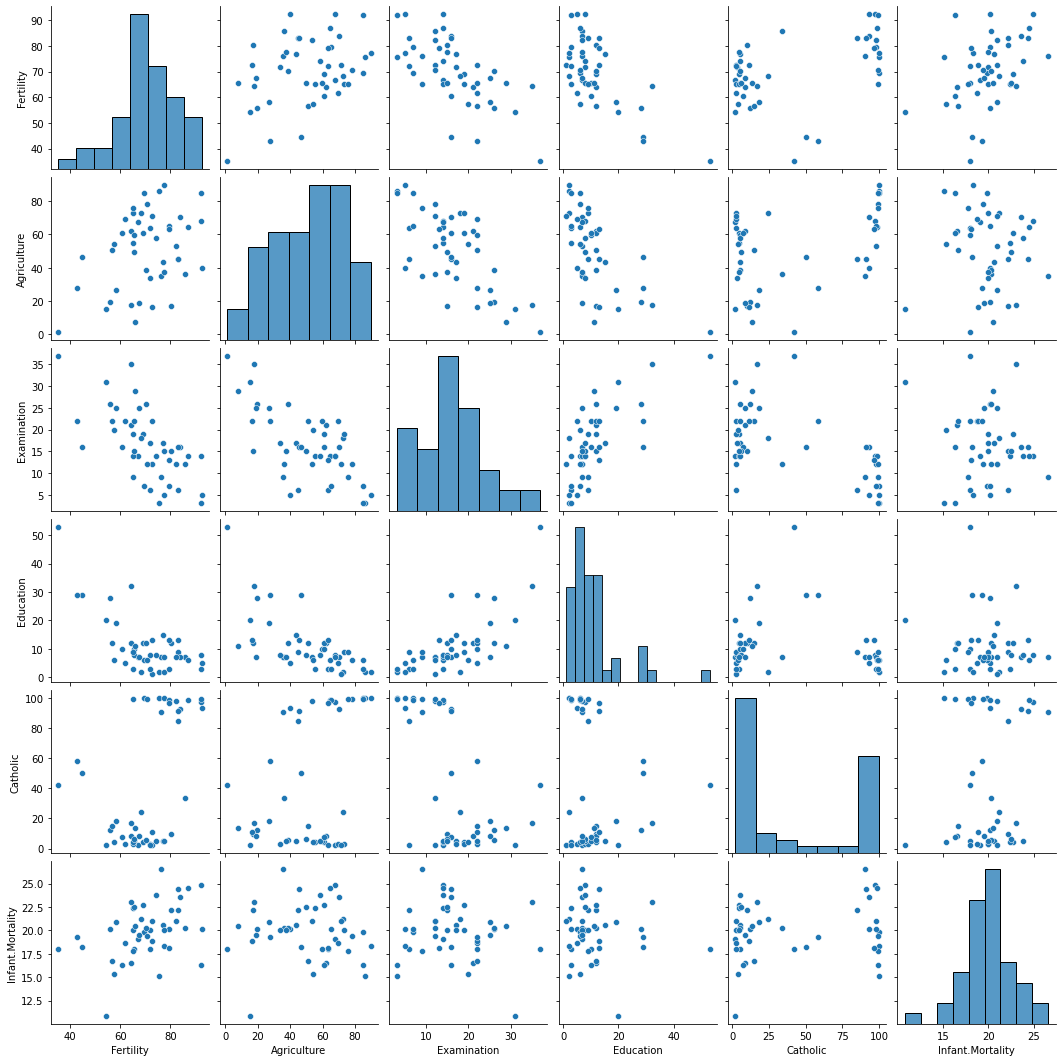

In [15]:
sns.pairplot(swiss)

<hr style="border:1px solid black"> </hr>

## Using IQR
- for non-normal distributions

#### steps to defining IQR/Tukey Method:
1. get the Q1 and Q3 values
2. determine our multiplier (typically 1.5)
3. use qualities to assert abnormalities

In [16]:
multiplier = 1.5
q1 = swiss.Examination.quantile(0.25)
q3 = swiss.Examination.quantile(0.75)

In [17]:
q1, q3

(12.0, 22.0)

In [18]:
iqr = q3 - q1

In [19]:
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

In [20]:
inner_lower_fence, inner_upper_fence

(-3.0, 37.0)

In [21]:
#show upper fence OR ( | ) lower fence
swiss[(swiss['Examination'] < inner_lower_fence) | (swiss['Examination'] > inner_upper_fence)]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality


In [22]:
## ^ this shows that there is NO outlier in "examination"

In [23]:
## ZScore
#### Steps 
1. subtract the datapoint from the mean
2. divide by standard deviation

SyntaxError: invalid syntax (<ipython-input-23-4c5e64cc27a6>, line 3)

In [ ]:
z_score = pd.Series((swiss['Infant.Mortality'] - swiss['Infant.Mortality'].mean()) / swiss['Infant.Mortality'].std())

In [ ]:
swiss['inf_mort_zs'] = z_score

In [ ]:
swiss[swiss['inf_mort_zs'].abs() >=2]

In [ ]:
multiplier = 1.5
q1 = swiss['Infant.Mortality'].quantile(0.25)
q3 = swiss['Infant.Mortality'].quantile(0.75)

In [ ]:
iqr= q3-q1

In [ ]:
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)
inner_lower_fence, inner_upper_fence

In [ ]:
swiss[(swiss['Infant.Mortality'] <inner_lower_fence) | (swiss['Infant.Mortality'] > inner_upper_fence)]